<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Install-and-import-the-libraries" data-toc-modified-id="Install-and-import-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Install and import the libraries</a></span></li><li><span><a href="#Fetch-the-stocks-price-from-yahoo-finance" data-toc-modified-id="Fetch-the-stocks-price-from-yahoo-finance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fetch the stocks price from yahoo finance</a></span><ul class="toc-item"><li><span><a href="#Scraping-the-stock-tickers-from-wikipedia" data-toc-modified-id="Scraping-the-stock-tickers-from-wikipedia-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Scraping the stock tickers from wikipedia</a></span></li><li><span><a href="#Choose-Date-Range" data-toc-modified-id="Choose-Date-Range-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Choose Date Range</a></span></li><li><span><a href="#Fetch-the-Stocks'-Datasets" data-toc-modified-id="Fetch-the-Stocks'-Datasets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fetch the Stocks' Datasets</a></span></li><li><span><a href="#Fetch-the-stocks'-data-save-in-one-CSV-file" data-toc-modified-id="Fetch-the-stocks'-data-save-in-one-CSV-file-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fetch the stocks' data save in one CSV file</a></span></li></ul></li><li><span><a href="#Dataset-Preprocessing" data-toc-modified-id="Dataset-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Target-data-preprocessing" data-toc-modified-id="Target-data-preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Target data preprocessing</a></span></li><li><span><a href="#Add-Moving-Average-for-target-stock" data-toc-modified-id="Add-Moving-Average-for-target-stock-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Add Moving Average for target stock</a></span></li><li><span><a href="#Add-rate-of-increase-in-volume,-rate-of-increase-in-Close-price,-RSI,-OBV-and-CCI-for-target-stock" data-toc-modified-id="Add-rate-of-increase-in-volume,-rate-of-increase-in-Close-price,-RSI,-OBV-and-CCI-for-target-stock-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Add rate of increase in volume, rate of increase in Close price, RSI, OBV and CCI for target stock</a></span></li><li><span><a href="#Join-each-stock-Close-price-to-be-a-new-dataframe" data-toc-modified-id="Join-each-stock-Close-price-to-be-a-new-dataframe-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Join each stock Close price to be a new dataframe</a></span></li><li><span><a href="#Compile-the-target-data-frame-with-the-200-stock-Close-price-to-be-a-frame" data-toc-modified-id="Compile-the-target-data-frame-with-the-200-stock-Close-price-to-be-a-frame-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Compile the target data frame with the 200 stock Close price to be a frame</a></span></li></ul></li></ul></div>

# Install and import the libraries

In [1]:
import sys
# Check if local computer has the library yfinance. If not, install. Then Import it.
!{sys.executable} -m pip install yfinance 

In [15]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29088 sha256=9730bb6a64936ef3bf1837aaaaace15c01b5dec2807d454e0c8221a3db4781c7
  Stored in directory: c:\users\86189\appdata\local\pip\cache\wheels\6a\76\03\7f785aaa50b9c6ec7e3fd105a62c1b2c45a034512d51e024a9
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import datetime as dt
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
import pickle
import random
import ta

# Fetch the stocks price from yahoo finance

## Scraping the stock tickers from wikipedia

In [14]:
# Fetch the list of tickers from wikipedia
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing the tickers
table = soup.find('table', {'class': 'wikitable sortable'})

# Get the tickers
tickers = []
for row in table.find_all('tr')[1:]:
    ticker = row.find_all('td')[0].text.strip()
    tickers.append(ticker)
    
# Remove non-existing stocks' tickers     
tickers = [ticker for ticker in tickers if ticker not in ['BRK.B', 'BF.B','CEG','GEHC','OGN']]
print(len(tickers))

498


In [140]:
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA'

In [15]:
# Save the tickers list as a file
with open('SP500tickers.pickle', 'wb') as f:
    pickle.dump(tickers, f)

## Choose Date Range

In [16]:
# Choose date range - format should be 'YYYY-MM-DD'
startDate = dt.datetime(2015,1,1)
endDate = dt.datetime(2023,3,5)

## Fetch the Stocks' Datasets

In [216]:
# Choose your ticker
tickerSymbols = tickers

status = {tickerSymbol: 0 for tickerSymbol in tickerSymbols}
while len(tickerSymbols) != 0:
          
    for tickerSymbol in tickerSymbols:  
        
        # Create ticker yfinance object
        tickerData = yf.Ticker(tickerSymbol)
        
        # Create historic data dataframe and fetch the data for the dates given. 
        df = tickerData.history(start = startDate, end = endDate)
     
        # Add the company name column
        df['Company_name']= tickerSymbol
        
        # Change the date column to a pandas date time column 
        # Reset the index of the dataframe
        df.reset_index(inplace=True)
    
        # Define string format
        date_change = '%Y-%m-%d'

        # Perform the date type change
        df['Date'] = pd.to_datetime(df['Date'], format = date_change)

        # Save the stock price to the csv file
        df.to_csv(f'{tickerSymbol}.csv',index=None)
        
  
        if len(df) == status[tickerSymbol]:
            # remove the stock
            tickerSymbols.remove(tickerSymbol) 
        status[tickerSymbol] = len(df)

There are 498 CSV files.

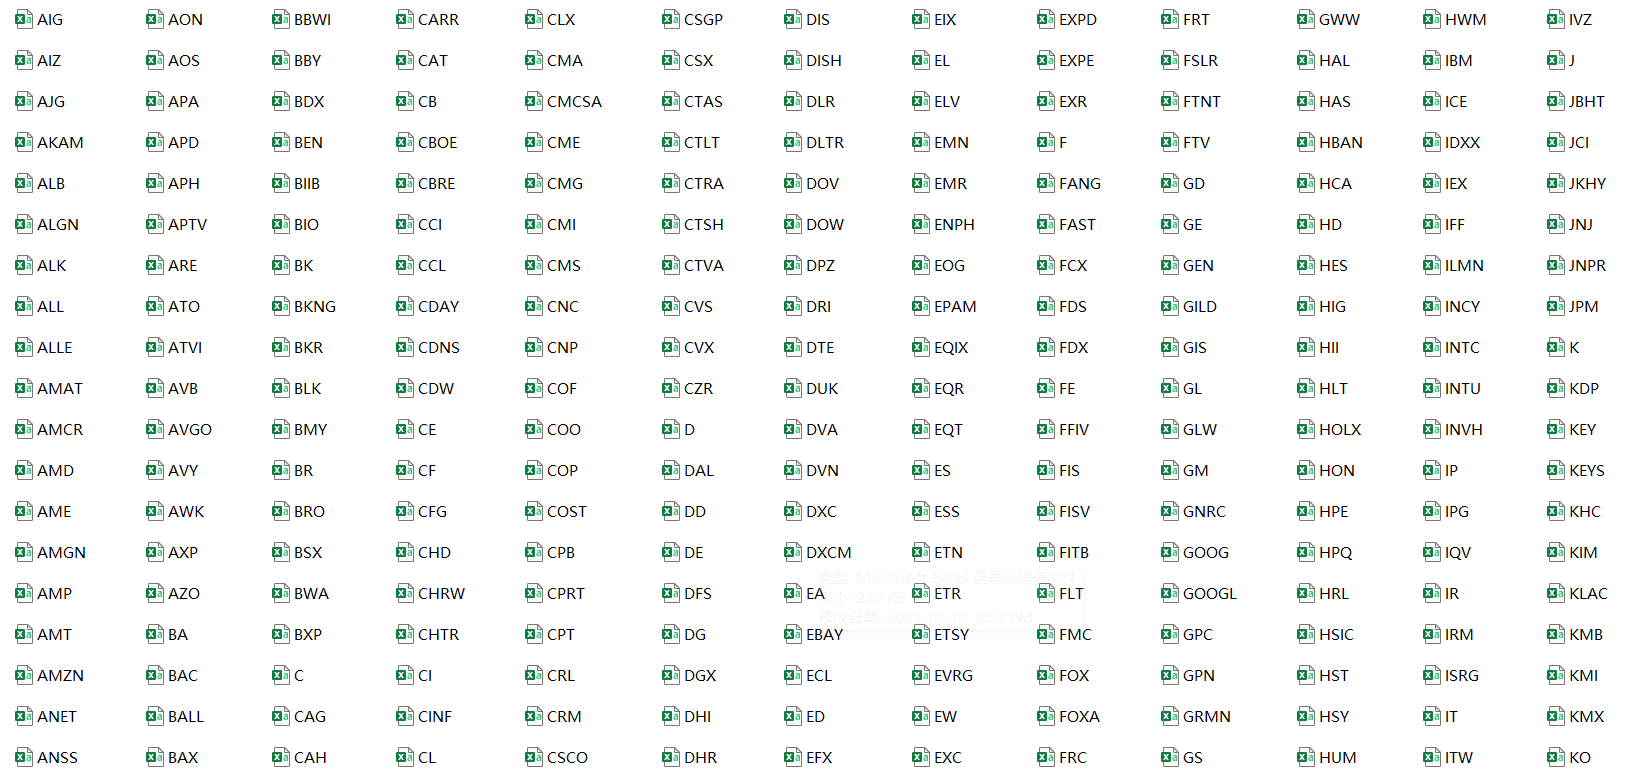

In [137]:
df_sample=pd.read_csv('data/AAPL.csv')
df_sample

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company_name
0,2015-01-02 00:00:00-05:00,25.028562,25.039797,24.120802,24.565695,212818400,0.0,0.0,AAPL
1,2015-01-05 00:00:00-05:00,24.332022,24.412912,23.684906,23.873648,257142000,0.0,0.0,AAPL
2,2015-01-06 00:00:00-05:00,23.938803,24.138779,23.509638,23.875889,263188400,0.0,0.0,AAPL
3,2015-01-07 00:00:00-05:00,24.087098,24.311791,23.974752,24.210680,160423600,0.0,0.0,AAPL
4,2015-01-08 00:00:00-05:00,24.543236,25.199339,24.424147,25.140919,237458000,0.0,0.0,AAPL
...,...,...,...,...,...,...,...,...,...
2051,2023-02-27 00:00:00-05:00,147.710007,149.169998,147.449997,147.919998,44998500,0.0,0.0,AAPL
2052,2023-02-28 00:00:00-05:00,147.050003,149.080002,146.830002,147.410004,50547000,0.0,0.0,AAPL
2053,2023-03-01 00:00:00-05:00,146.830002,147.229996,145.009995,145.309998,55479000,0.0,0.0,AAPL
2054,2023-03-02 00:00:00-05:00,144.380005,146.710007,143.899994,145.910004,52238100,0.0,0.0,AAPL


In [139]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2056 non-null   object 
 1   Open          2056 non-null   float64
 2   High          2056 non-null   float64
 3   Low           2056 non-null   float64
 4   Close         2056 non-null   float64
 5   Volume        2056 non-null   int64  
 6   Dividends     2056 non-null   float64
 7   Stock Splits  2056 non-null   float64
 8   Company_name  2056 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 144.7+ KB


## Fetch the stocks' data save in one CSV file

In [5]:
# Get the list of S&P 500 stocks
sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]["Symbol"]

# Define the start and end dates for the data
start_date = "2015-01-01"
end_date = "2023-03-05"

# Create an empty dataframe to store the data
df = pd.DataFrame()

# Loop through the list of stocks and download the historical data
for ticker in sp500:
    data = yf.download(ticker, start=start_date, end=end_date)
    data["Company_name"] = ticker
    df = pd.concat([df, data])

# Reset the index of the dataframe
df.reset_index(inplace=True)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [6]:
df.to_csv("sp500_history.csv", index=False)

# Dataset Preprocessing

## Target data preprocessing

In [115]:
df_target=pd.read_csv('data/GOOGL.csv')
df_target.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company_name'],
      dtype='object')

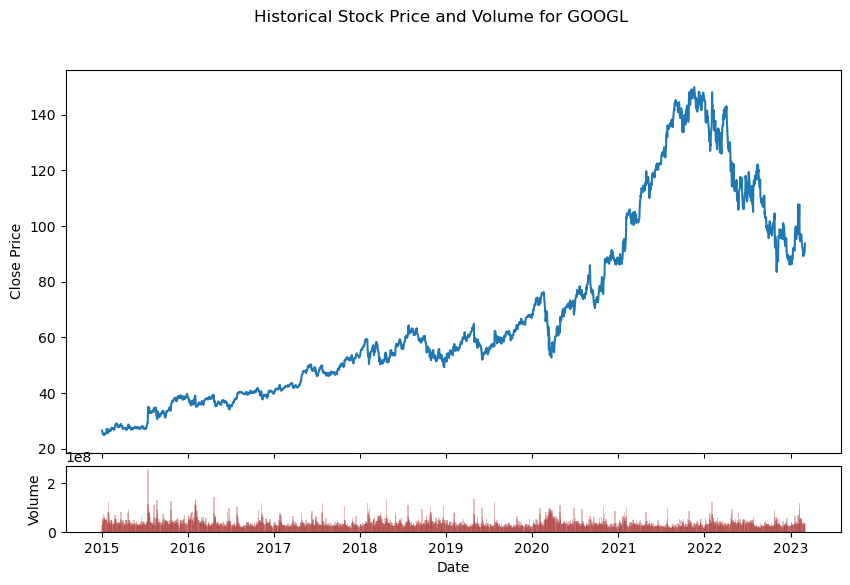

In [116]:
# Convert the 'Date' column to a pandas datetime column
df_target['Date'] = pd.to_datetime(df_target['Date'], utc=True)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)

# Create a line plot with the Date column as the x-axis and the Close column as the y-axis
ax1.plot(df_target['Date'], df_target['Close'])
ax1.set_ylabel('Close Price')

# Create a bar plot with the Date column as the x-axis and the Volume column as the y-axis
ax2.bar(df_target['Date'], df_target['Volume'], width=6, color="brown", alpha=0.3)
ax2.set_ylabel('Volume')

# Set the x-axis tick labels to be visible only on the Volume plot
ax1.tick_params(labelbottom=False)
ax2.xaxis.set_tick_params(labelsize=10)

# Set the plot title and axis labels
plt.suptitle('Historical Stock Price and Volume for GOOGL')
ax2.set_xlabel('Date')

# Save the figure
fig.savefig('Historical Stock Price and Volume for GOOGL.png')

# Show the plot
plt.show()


## Add Moving Average for target stock

In [117]:
# Set 50 moving average
df_target['Moving_av']= df_target['Close'].rolling(window=50,min_periods=0).mean()

In [118]:
# # Create a figure with two subplots
# fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 6))

# # Create a line plot with the Date column as the x-axis and the Close column as the y-axis
# ax.plot(df_target['Date'], df_target['Moving_av'])
# ax.set_ylabel('Moving Average')

# # Set the plot title and axis labels
# plt.suptitle('Historical Moving Average Stock Price for GOOGL')
# plt.xlabel('Date')
# plt.xticks

# # Save the figure
# fig.savefig('Historical Moving Average Stock Price for GOOGL.png')

# # Show the plot
# plt.show()

## Add rate of increase in volume, rate of increase in Close price, RSI, OBV and CCI for target stock

The relative strength index (RSI) is a technical indicator used in the analysis of financial markets. It is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period

On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds volume on up days and subtracts volume on down days.

The Commodity Channel Index (CCI) is a technical indicator that measures the current price level relative to an average price level over a given period of time

In [119]:
# Calculate the rate of increase in volume
df_target['Volume_rate'] = (df_target['Volume'] - df_target['Volume'].shift(1)) / df_target['Volume'].shift(1)

# Calculate the rate of increase in adjusted close
df_target['Close_rate'] = (df_target['Close'] - df_target['Close'].shift(1)) / df_target['Close'].shift(1)

# Calculate RSI with period of 14
df_target['RSI'] = ta.momentum.RSIIndicator(df_target['Close'], window=14).rsi()

# Calculate OBV
df_target['OBV'] = ta.volume.OnBalanceVolumeIndicator(df_target['Close'], df_target['Volume']).on_balance_volume()

# Calculate CCI with period of 20
df_target['CCI'] = ta.trend.CCIIndicator(df_target['High'], df_target['Low'], df_target['Close'], window=20).cci()


In [120]:
# Count null value of each columns
df_target.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Company_name     0
Moving_av        0
Volume_rate      1
Close_rate       1
RSI             13
OBV              0
CCI             19
dtype: int64

In [121]:
# Fill null values with 0
df_target.fillna(0, inplace=True)
# Drop useless columns
df_target.drop(columns=['Dividends','Stock Splits'],axis=1,inplace=True)

In [122]:
df_target.head(3)

,Date,Open,High,Low,Close,Volume,Company_name,Moving_av,Volume_rate,Close_rate,RSI,OBV,CCI
0,2015-01-02 05:00:00+00:00,26.629999,26.790001,26.393999,26.477501,26480000,GOOGL,26.477501,0.000000,0.000000,0.0,26480000,0.0
1,2015-01-05 05:00:00+00:00,26.357500,26.399500,25.887501,25.973000,41182000,GOOGL,26.225250,0.555211,-0.019054,0.0,-14702000,0.0
2,2015-01-06 05:00:00+00:00,26.025000,26.060499,25.277500,25.332001,54456000,GOOGL,25.927500,0.322325,-0.024679,0.0,-69158000,0.0


In [123]:
# Save the feature file for our target stock 
df_target.to_csv('target_GOOGL_OK.csv',index=None)

In [124]:
df_target.describe()

,Open,High,Low,Close,Volume,Moving_av,Volume_rate,Close_rate,RSI,OBV,CCI
count,2056.000000,2056.000000,2056.000000,2056.000000,2.056000e+03,2056.000000,2056.000000,2056.000000,2056.000000,2.056000e+03,2056.000000
mean,68.615186,69.333440,67.888819,68.628890,3.653815e+07,67.808584,0.059883,0.000776,53.949587,2.242620e+09,26.113988
std,33.484946,33.880476,33.068039,33.474096,1.773258e+07,33.481817,0.390817,0.018019,12.201002,1.087979e+09,107.421644
min,24.962000,25.014000,24.545500,24.853001,9.312000e+06,25.386150,-0.666604,-0.116341,0.000000,-1.421600e+08,-303.122274
25%,41.397874,41.505499,41.128251,41.354751,2.595800e+07,40.267177,-0.193480,-0.007187,45.620779,1.439188e+09,-58.351546
50%,57.612249,58.192249,57.068249,57.700500,3.197400e+07,57.234195,-0.023903,0.001039,54.032985,2.011142e+09,40.950988
75%,90.282501,91.255003,89.324999,90.285002,4.147100e+07,92.345857,0.228543,0.009261,62.265780,3.289872e+09,105.870510
max,151.250000,151.546494,148.899002,149.838501,2.571620e+08,145.636060,3.197881,0.162584,88.641008,4.287766e+09,422.905212


## Join each stock Close price to be a new dataframe

In [334]:
# # Read the list of tickers from the "500tickers.pickle" file and assign it to the tickers variable
# def choose_tickers(num_tickers):
#     with open("SP500tickers.pickle", 'rb') as f:
#         tickers = pickle.load(f)

#     nulltickers = []

#     for ticker in tickers:
#         df = pd.read_csv(f"data/{ticker}.csv")
#         if df['Close'].isnull().values.any():
#             nulltickers.append(ticker)
# #         print(nulltickers)  
        
#     # Random choose 200 tickers no null values        
#     chosen_tickers = random.sample([t for t in tickers if t not in nulltickers], num_tickers)

#     return chosen_tickers

# Read the list of tickers from the "SP500tickers.pickle" file and assign it to the tickers variable
def choose_tickers(num_tickers):
    with open("SP500tickers.pickle", 'rb') as f:
        tickers = pickle.load(f)

    nulltickers = []

    for ticker in tickers:
        df = pd.read_csv(f"data/{ticker}.csv")
        if df.isnull().values.any():
            nulltickers.append(ticker)
            df.dropna(axis=1, inplace=True)  # drop columns with null values
#         print(f"Null tickers: {nulltickers}")  
        
    # Random choose 200 tickers no null values        
    chosen_tickers = random.sample([t for t in tickers if t not in nulltickers], num_tickers)

    return chosen_tickers


# Join the dataframes for all tickers into a single dataframe
def compile_data(tickers):
    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        if ticker in ['GOOGL', 'MSFT']:
            continue
        if not os.path.exists(f"data/{ticker}.csv"):
            continue
        df = pd.read_csv(f"data/{ticker}.csv")
        df.set_index('Date', inplace=True)

        if df['Close'].isnull().values.any():
            continue
                
        df.rename(columns={'Close': ticker}, inplace=True)
        
        # Drop unnecessary columns
        df.drop(['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'Company_name'], axis=1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')

    return main_df



# Save the dataframe to a CSV file
def save_data(dataframe, filename):
    dataframe.to_csv(f"data/{filename}.csv")


# Call functions
ts = choose_tickers(200)
df200 = compile_data(ts)
save_data(df200, "200stocks_close")


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [125]:
df_target = pd.read_csv("target_GOOGL_OK.csv")
df200 = pd.read_csv("200stocks_close.csv")

In [142]:
df200.shape,df_target.shape

((2056, 201), (2056, 13))

In [127]:
df200.describe()

,AWK,KLAC,A,CMCSA,ADM,GILD,XEL,UPS,OXY,CSCO,...,BLK,AOS,AAPL,DHR,IDXX,V,CLX,MSI,UAL,PKG
count,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,...,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,102.439632,165.363756,81.453993,36.380469,46.674201,64.846650,49.231161,119.133311,48.721042,37.086790,...,482.566202,49.057829,72.756884,149.563363,271.093830,144.477232,134.416598,133.714966,59.692743,95.189849
std,40.399798,116.158929,39.171105,8.641286,17.276801,9.492008,14.799152,42.334637,17.075693,10.956407,...,184.207248,12.415959,49.988844,83.022140,172.744439,58.059968,31.253062,65.705951,17.733351,29.669530
min,42.151192,39.501446,31.415504,22.610003,24.802151,51.382702,25.515318,71.044334,8.789413,18.048708,...,242.784027,23.884089,20.883036,59.657997,61.959999,58.211426,83.619438,49.705009,19.920000,36.552021
25%,68.855263,72.675535,45.971096,29.526520,36.245221,57.951669,36.015713,88.222557,37.177319,25.844501,...,326.798309,41.209388,29.555477,78.745506,120.327497,79.582184,110.038380,73.820160,45.544999,72.594854
50%,90.823181,105.697464,68.249989,34.901913,38.583508,62.001369,47.354538,98.178703,54.993298,38.937735,...,429.082886,48.432043,47.871416,107.615406,228.195000,142.624779,134.316307,122.017994,57.500000,94.046909
75%,143.910271,286.900314,118.676641,41.387233,53.494491,68.154324,63.407835,158.296490,60.271667,45.101557,...,623.895081,57.462326,124.886387,231.624332,384.852493,200.669514,152.518085,176.420906,73.085001,124.038988
max,184.857437,437.860352,177.652649,59.429180,97.138283,94.696831,76.382469,222.712936,75.814987,61.521923,...,940.248962,83.849670,180.683884,330.726990,705.760010,247.784668,221.928619,272.010010,96.699997,162.165924


## Compile the target data frame with the 200 stock Close price to be a frame

In [128]:
df_target

,Date,Open,High,Low,Close,Volume,Company_name,Moving_av,Volume_rate,Close_rate,RSI,OBV,CCI
0,2015-01-02 05:00:00+00:00,26.629999,26.790001,26.393999,26.477501,26480000,GOOGL,26.477501,0.000000,0.000000,0.000000,26480000,0.000000
1,2015-01-05 05:00:00+00:00,26.357500,26.399500,25.887501,25.973000,41182000,GOOGL,26.225250,0.555211,-0.019054,0.000000,-14702000,0.000000
2,2015-01-06 05:00:00+00:00,26.025000,26.060499,25.277500,25.332001,54456000,GOOGL,25.927500,0.322325,-0.024679,0.000000,-69158000,0.000000
3,2015-01-07 05:00:00+00:00,25.547501,25.574499,25.182501,25.257500,46918000,GOOGL,25.760000,-0.138424,-0.002941,0.000000,-116076000,0.000000
4,2015-01-08 05:00:00+00:00,25.075500,25.375000,24.750999,25.345501,73054000,GOOGL,25.677100,0.557057,0.003484,0.000000,-43022000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,2023-02-27 05:00:00+00:00,89.870003,90.160004,89.339996,89.870003,27502300,GOOGL,93.459600,-0.248265,0.008303,40.153145,3239050300,-111.379143
2052,2023-02-28 05:00:00+00:00,89.330002,91.230003,89.320000,90.059998,30142000,GOOGL,93.359400,0.095981,0.002114,40.613288,3269192300,-94.642899
2053,2023-03-01 05:00:00+00:00,89.980003,91.029999,89.669998,90.360001,31111200,GOOGL,93.349400,0.032154,0.003331,41.379712,3300303500,-84.976895
2054,2023-03-02 05:00:00+00:00,89.660004,92.279999,89.589996,92.000000,32204400,GOOGL,93.384200,0.035138,0.018150,45.519014,3332507900,-65.425051


In [129]:
# convert to datetime
df_target['Date'] = pd.to_datetime(df_target['Date'])
# remove time from Date and store it in a new column
df_target['Date_New'] = df_target['Date'].dt.date

In [130]:
# Drop Date column
df_target.drop(['Date'],axis=1,inplace=True)
df_target.head()

,Open,High,Low,Close,Volume,Company_name,Moving_av,Volume_rate,Close_rate,RSI,OBV,CCI,Date_New
0,26.629999,26.790001,26.393999,26.477501,26480000,GOOGL,26.477501,0.000000,0.000000,0.0,26480000,0.0,2015-01-02
1,26.357500,26.399500,25.887501,25.973000,41182000,GOOGL,26.225250,0.555211,-0.019054,0.0,-14702000,0.0,2015-01-05
2,26.025000,26.060499,25.277500,25.332001,54456000,GOOGL,25.927500,0.322325,-0.024679,0.0,-69158000,0.0,2015-01-06
3,25.547501,25.574499,25.182501,25.257500,46918000,GOOGL,25.760000,-0.138424,-0.002941,0.0,-116076000,0.0,2015-01-07
4,25.075500,25.375000,24.750999,25.345501,73054000,GOOGL,25.677100,0.557057,0.003484,0.0,-43022000,0.0,2015-01-08


In [132]:
import pytz

# convert to datetime
df200['Date'] = pd.to_datetime(df200['Date'])

tz = pytz.timezone('US/Eastern')
df200['Date'] = df200['Date'].apply(lambda x: x.astimezone(tz))

# remove time from Date and store it in a new column
df200['Date_New'] = df200['Date'].dt.date

# Drop Date column
df200.drop(['Date'], axis=1, inplace=True)

df200

,AWK,KLAC,A,CMCSA,ADM,GILD,XEL,UPS,OXY,CSCO,...,AOS,AAPL,DHR,IDXX,V,CLX,MSI,UAL,PKG,Date_New
0,46.195347,58.393772,37.885479,24.300968,41.257874,73.277443,28.322767,85.914291,60.862122,21.460148,...,24.668045,24.565695,62.357712,73.665001,62.620548,83.619438,57.572784,66.339996,61.357620,2015-01-02
1,45.484520,57.089481,37.175594,23.805380,39.830257,74.728935,28.001268,84.194130,58.605736,21.032650,...,24.236429,23.873648,61.739372,73.154999,61.238262,83.635529,56.317616,66.150002,60.793327,2015-01-05
2,45.604424,55.403042,36.596470,23.494835,39.045074,75.392921,28.150251,83.641502,58.107666,21.024872,...,24.038237,23.875889,61.317440,73.389999,60.843651,83.989738,55.841537,64.580002,60.236889,2015-01-06
3,46.186790,56.325184,37.082184,23.473564,39.631985,76.805809,28.393337,84.419853,58.115211,21.219189,...,24.214409,24.210680,61.688446,74.870003,61.658840,85.430779,55.772282,65.529999,60.174175,2015-01-07
4,46.366627,57.263927,38.193722,23.984047,39.053013,78.983055,28.722668,85.937630,58.628384,21.382412,...,24.844210,25.140919,62.641434,75.415001,62.485855,86.388763,56.637905,66.639999,61.694622,2015-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,139.779999,379.089996,142.179993,37.349998,81.190002,80.889999,65.400002,182.229996,58.959999,48.730000,...,65.320000,147.919998,247.949997,468.179993,220.350006,155.059998,262.940002,50.700001,136.869995,2023-02-27
2052,140.380005,379.380005,141.970001,37.169998,79.599998,80.529999,64.570000,182.490005,58.560001,48.419998,...,65.629997,147.410004,247.529999,473.239990,219.940002,155.440002,262.809998,51.959999,136.720001,2023-02-28
2053,138.139999,378.339996,137.509995,36.630001,79.239998,79.589996,63.270000,183.080002,59.709999,48.340000,...,66.769997,145.309998,245.360001,469.100006,218.360001,154.690002,263.350006,52.389999,138.699997,2023-03-01
2054,138.559998,378.309998,141.669998,36.950001,80.570000,79.620003,64.339996,184.679993,60.270000,48.529999,...,67.639999,145.910004,249.729996,476.130005,219.059998,156.479996,263.559998,52.560001,141.009995,2023-03-02


In [133]:
# Compile the target data frame with the 200 stock Close price to be a frame
concatenated_df = df_target.merge(df200, on='Date_New', how='left')

concatenated_df.head()

,Open,High,Low,Close,Volume,Company_name,Moving_av,Volume_rate,Close_rate,RSI,...,BLK,AOS,AAPL,DHR,IDXX,V,CLX,MSI,UAL,PKG
0,26.629999,26.790001,26.393999,26.477501,26480000,GOOGL,26.477501,0.000000,0.000000,0.0,...,291.556427,24.668045,24.565695,62.357712,73.665001,62.620548,83.619438,57.572784,66.339996,61.357620
1,26.357500,26.399500,25.887501,25.973000,41182000,GOOGL,26.225250,0.555211,-0.019054,0.0,...,284.012726,24.236429,23.873648,61.739372,73.154999,61.238262,83.635529,56.317616,66.150002,60.793327
2,26.025000,26.060499,25.277500,25.332001,54456000,GOOGL,25.927500,0.322325,-0.024679,0.0,...,279.599396,24.038237,23.875889,61.317440,73.389999,60.843651,83.989738,55.841537,64.580002,60.236889
3,25.547501,25.574499,25.182501,25.257500,46918000,GOOGL,25.760000,-0.138424,-0.002941,0.0,...,285.516602,24.214409,24.210680,61.688446,74.870003,61.658840,85.430779,55.772282,65.529999,60.174175
4,25.075500,25.375000,24.750999,25.345501,73054000,GOOGL,25.677100,0.557057,0.003484,0.0,...,288.851196,24.844210,25.140919,62.641434,75.415001,62.485855,86.388763,56.637905,66.639999,61.694622


In [141]:
concatenated_df.shape

(2056, 213)

In [135]:
# Save the clean date frame to a CSV file
concatenated_df.to_csv("Cleandata.csv",index=False)